https://github.com/facebook/prophet
https://facebook.github.io/prophet/docs/quick_start.html#python-api


* Prophet is for forecasting time series data
* Additive model where non-linear trends are fit with yearly and weekly seasonality, plus holidays
* Works best with daily periodicity data with at least one year of historical data
* Robust to missing data, shifts in the trend, and large outliers.

## Input
The input to Prophet is always a dataframe with two columns: `ds` and `y`. The ds (datestamp) column must contain a date or datetime (either is fine). The y column must be numeric, and represents the measurement we wish to forecast.

## `sklearn`-like
* Instantiate
* `.model()`
* `.fit()`

# Installation
1. `pip install pystan` (better yet, use a docker container, [pystan installation can be hairy](http://pystan.readthedocs.io/en/latest/installation_beginner.html))
1. `pip install fbprophet`

## Or (easiest)
`conda install -c conda-forge fbprophet`

In [2]:
import quilt
quilt.install("examples/prophet", force=True)

All fragments are already downloaded!


In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

from quilt.data.examples import prophet as pdata

In [4]:
df = pdata.peyton_manning()
df.head()

,ds,y
0,2007-12-10,14629
1,2007-12-11,5012
2,2007-12-12,3582
3,2007-12-13,3205
4,2007-12-14,2680


In [6]:
df.describe()

,y
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


In [7]:
m = Prophet()
# log transform views to tame magnitude
df['y'] = np.log(df['y'])
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/karve/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [8]:
future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14


In [9]:
forecast = m.predict(future)

In [13]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2007-12-10,2.082193,2.082193,2.082193,2.107597,2.247077,0.096620,0.096620,0.096620,0.096620,0.096620,0.096620,0.038945,0.038945,0.038945,0.057675,0.057675,0.057675,2.178813
1,2007-12-11,2.082005,2.082005,2.082005,2.086705,2.225342,0.070486,0.070486,0.070486,0.070486,0.070486,0.070486,0.014868,0.014868,0.014868,0.055618,0.055618,0.055618,2.152491
2,2007-12-12,2.081817,2.081817,2.081817,2.060568,2.202406,0.047423,0.047423,0.047423,0.047423,0.047423,0.047423,-0.006249,-0.006249,-0.006249,0.053672,0.053672,0.053672,2.129240
3,2007-12-13,2.081629,2.081629,2.081629,2.056703,2.198182,0.045192,0.045192,0.045192,0.045192,0.045192,0.045192,-0.006697,-0.006697,-0.006697,0.051889,0.051889,0.051889,2.126821
4,2007-12-14,2.081441,2.081441,2.081441,2.053257,2.189063,0.043218,0.043218,0.043218,0.043218,0.043218,0.043218,-0.007100,-0.007100,-0.007100,0.050318,0.050318,0.050318,2.124659


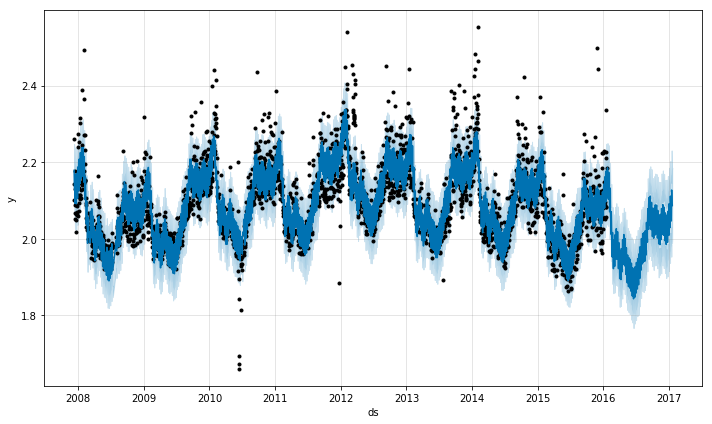

In [14]:
m.plot(forecast)

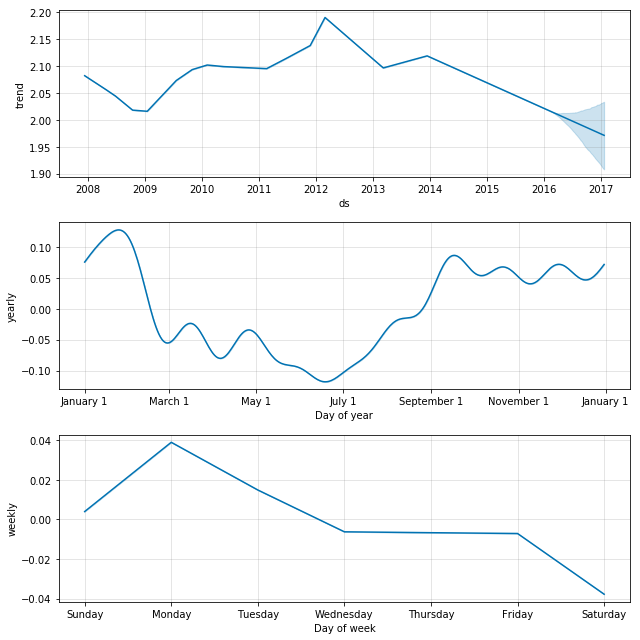

In [15]:
m.plot_components(forecast)